In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

In [3]:
g = 9.81
gamma = 74e-3
rho = 1e3

In [4]:
l_c = 2 * np.pi * np.sqrt(gamma / (rho*g))
print(f"{l_c=}")
k_c = 2 * np.pi / l_c

l_c=0.017256838094849535


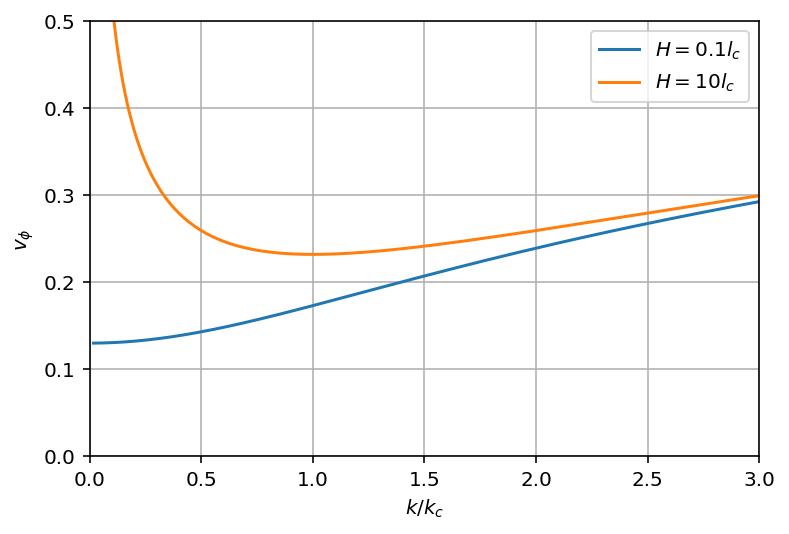

In [5]:
lambda_ = np.logspace(-3, 0, 256)
k = 2*np.pi/lambda_
plt.figure()
for x in (0.1, 10):
    H = x * l_c
    v_phi = np.sqrt( (g + gamma*(k**2)/rho)*np.tanh(k*H)/k)
    plt.plot(k/k_c, v_phi, '-', label=f"$H={x:} l_c$")
plt.legend()
plt.grid()
plt.xlabel("$k/k_c$")
plt.ylabel("$v_{\phi}$")
plt.xlim((0, 3))
plt.ylim((0,0.5))
plt.show()

In [6]:
H = 10 * l_c
k = k_c * np.linspace(1e-3, 3, 512)
v_phi = np.sqrt( (g + gamma*(k**2)/rho)*np.tanh(k*H)/k)
omega = np.sqrt( k * (g + gamma * (k**2)/rho) * np.tanh(k*H))
v_g = np.diff(omega)/np.diff(k)

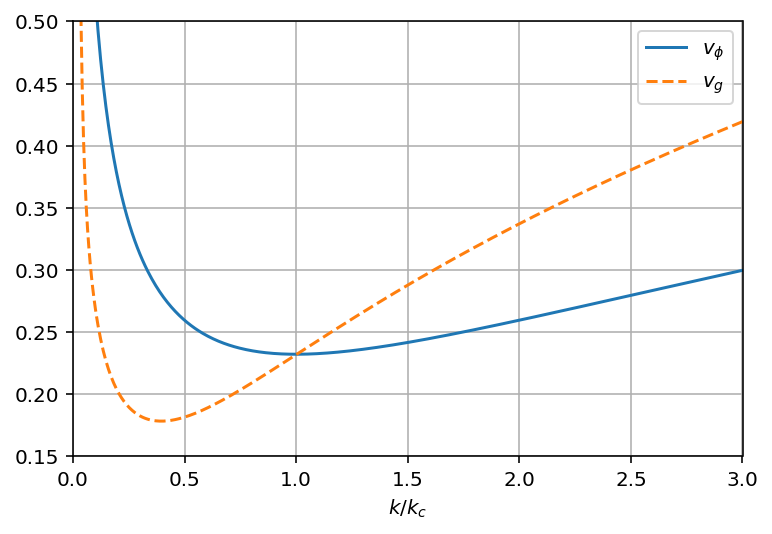

In [7]:
plt.figure()
plt.plot(k/k_c, v_phi, '-', label="$v_{\phi}$")
plt.plot(k[1:]/k_c, v_g, '--', label="$v_g$")
plt.xlim((0,3))
plt.ylim((0.15, 0.5))
plt.xlabel("$k/k_c$")
plt.legend()
plt.grid()
plt.show()

# Diapason

In [8]:
f_La = 440.0
omega_La = 2 * np.pi * f_La

k_La = 46.8243492756878 cm^(-1)
lambda_La = 1.3418628137651343 mm
v_phi_La = 0.5904195529102624 m/s


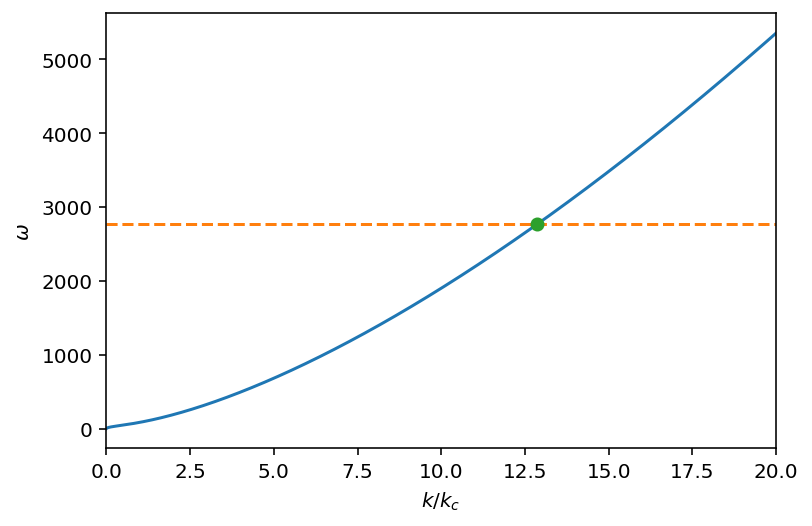

In [17]:
H = 10 * l_c
k = k_c * np.linspace(1e-3, 20, 1024)
omega = np.sqrt( k * (g + gamma * (k**2)/rho) * np.tanh(k*H))

k_La = np.interp(omega_La, omega, k)
lambda_La = 2 * np.pi / k_La
v_phi_La = np.sqrt( (g + gamma*(k_La**2)/rho)*np.tanh(k_La*H)/k_La)
print("k_La =", 1e-2 * k_La, "cm^(-1)")
print("lambda_La =", 1e3 * lambda_La, "mm")
print("v_phi_La =", v_phi_La, "m/s")

plt.figure()
plt.plot(k/k_c, omega, '-')
plt.plot([0, 20], [omega_La, omega_La], '--')
plt.plot([k_La/k_c], omega_La, 'o')
plt.xlim((0,20))
plt.xlabel("$k/k_c$")
plt.ylabel("$\omega$")
plt.show()